## Group Members and Contributions

- __Kenta Asai (A13784889)__
    - Data Analysis
    - Parking Meter Visualizations
- __Riley Froehlich (A13795579)__
    - Data Cleaning/Wrangling
    - Extracting Latitudes/Longitudes from Geocoding API
- __Aniket Ghatnekar (A14688625)__
    - Data Analysis, Correlations & Stats
    - Heatmap Visualizations
- __Stephanie Shon (A13811108)__
    - Data Cleaning/Wrangling
    - Descriptives & Ethics Considerations
- __Haimei Yang (A13519498)__
    - Data Analysis & Meters Visualizations
    - Limitations & Ethics Considerations
- __Jeffrey Yao (A14354925)__
    - Data Analysis
    - Data Frame Merging

## Introduction

 __OVERVIEW:__
 
 This data analysis focuses on finding geographical patterns and correlations between collision frequency and related  factors in the city of San Diego, using government recorded traffic datasets. All results found are tested for temporal validity and discussed in context of general applicability.

 __DATA SCIENCE QUESTION(S) & HYPOTHESIS:__

- Proposed Question
    - How does the frequency of traffic collisions change based on street properties, parking meter locations and what geographical patterns do collision data follow in the city of San Diego?

- Hypothesis
    - We hypothesize that traffic collisions in San Diego will correlate with street width, number of parking meters on streets, and will follow a similar geographical pattern of higher frequencies in areas with known higher traffic,  and will exhibit temporal validity.

We think this topic has ample scope to explore a very important civil and social safety issue. By analysing how traffic collisions vary based on a variety of factors in our own city of San Diego, we plan to find possible patterns established through the data. Although this is a specific analysis in only one city, we hope that highly correlational variables can be recognized with global applicability, at least to some degree.

### Background

Safety is the number one priority when driving. Unfortunately, traffic collisions and rule breaking happen regularly and can range from minor incidents to severe injuries and even death. The number of traffic collisions in San Diego increase every year, and this could potentially affect UCSD students and faculty as many people use cars to commute to and from school. As students of UCSD, we want to find out if San Diego traffic collisions are affected by factors such as street quality, traffic density and the number of parking meters in an effort to gain a better understanding of which areas are most prone to collisions.

There has been a multitude of prior research that has studied the relationship between traffic collisions and different factors such as parking and driver behavior, in an attempt to improve road safety.

For starters, it is important to note that in Miller’s (2016) article, he recognizes that “while pedestrian-related collisions made up a very small share of priority corridor collisions, they comprised over two-thirds (67%) of the fatal collisions on those roadways.” Considering the statistics on the amount of accidents that include pedestrians, there is a big concern that the collisions on the road may affect those who aren’t in a vehicle. This increases the awareness of how deadly these collisions can be, and will continue to be, if there aren’t preventative measures taken for both the pedestrian and driver. In addition, there has been a study by NYU that determined a “71% correlation between risky driving behavior and traffic accidents and concluded that safer driving habits would help to prevent future traffic accidents” (Bousquet, 2017).  The percentage of parking-related midblock accidents increase as the size of streets decrease from a highway to a local street (Jack B. Humphreys & Donald J. Wheeler 1979). Highways do not have parking, but smaller local roads have parking spaces and meters by the sidewalk. 

Although these studies have found that these behaviors seem to play a big factor in road accidents, our team wants to research the cause of collisions from a different perspective. With the pressing issue of the increase in traffic collisions every year, we wanted to find more data on whether the OCI (Overall Condition Index), street dimensions, the number of parking meters and/or spaces have played a role in the road accidents, including analysis of larger patterns of collisions, in hopes that future preventative measures can be made.

__References:__
- (Humphreys & Wheeler, 1979) : http://onlinepubs.trb.org/Onlinepubs/trr/1979/722/722-004.pdf
- (Miller, 2016): https://datasmart.ash.harvard.edu/news/article/san-jose-tackles-traffic-with-data-802)
- (Bousquet, 2017): https://datasmart.ash.harvard.edu/news/article/can-better-data-make-zero-traffic-deaths-a-reality-1138)

## Data

The following are links to the datasets to be used in this project:

- Traffic Collisions dataset: https://data.sandiego.gov/datasets/police-collisions/
- Street quality datasets:https://data.sandiego.gov/datasets/streets-overall-condition-index/
- Parking meter dataset: https://data.sandiego.gov/datasets/parking-meters-locations/


The traffic collisions dataset includes all kinds of unlawful acts caught by the local police, such as taking illegal turns, stop requirements, and hit and runs. There are a total of 22,862 observations and with each observation, there is an indicated date, time, street number, street name, street type, violation type, and the number of people injured or killed.

The street quality datasets contains two sets of data measuring the quality of streets in San Diego based on an Overall Condition Index (OCI). One data set is from 2011 and contains 28,098 observations whereas the other data set is from 2015 and contains 30,712 observations. Each observation has an overall condition index, street name, segment length, segment width, the square footage of the segment, what type of street and pavement it is, and a description on whether it is good, fair or poor. 

The parking meter dataset contains the location of parking meters in San Diego. There are a total of 4668 observations and each observation has a zone, an area, a sub-area and the meter’s longitude and latitude.  

All the datasets cover records over the past couple years, hence giving a large enough combined dataset to work with. We plan to extract the features our project is concerned with, and combine them sensibly into one dataset for ease of analysis.

Cleaning the data will be required as many entries under some columns are not filled. Fortunately, since these are mostly names of streets we do not need them (we will use the street locations and codes instead).

## Imports and Display Preparation

To start off, import all necessary libraries required for anaylsis. 

In [1]:
import numpy as np
import pandas as pd
import folium
from folium import plugins
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.font_manager import FontProperties
import seaborn as sns
from IPython.display import display_html
from scipy.stats.stats import pearsonr
from scipy import stats
import csv
import branca.colormap as cm

Now we define a function that lets you see multiple dataframes together.

In [2]:
# method to display all df heads
def multiple_df_display(*arg):
    html_str=''
    for df in arg:
        html_str+=df.to_html()
    display_html(html_str.replace('table','table style="display:inline"'),raw=True)

## Data Cleaning

For the cleaning process, we start by removing all columns in the four major dataframes, which will give no correlation, based on logic and common sense. These columns include numbering systems and id's which do not have any meaning inherently, for the purpose of our analyses. Otherwise, they are features which deviate from our question and hypothesis.

In [3]:
# read in datasets from csv files taken from -   https://data.sandiego.gov/datasets/
df_index = pd.read_csv("oci_2015_datasd.csv")
df_collisions = pd.read_csv("pd_collisions_datasd.csv")
df_meters = pd.read_csv("treas_parking_meters_loc_datasd.csv")

# drop OCI columns
df_index.drop( columns = ["seg_id", "seg_length_ft", "street_from",
                          "street_to", "oci_wt", "pvm_class", 
                          "func_class"], inplace = True )

# drop collision columns
df_collisions.drop(columns = ["police_beat", "report_id", "cross_st_name", 
                              "cross_st_type", "street_dir", "cross_st_dir", 
                              "violation_section", "violation_type", 
                              "charge_desc", "injured", "killed", 
                              "hit_run_lvl"], inplace = True)

# combine street name and street type
df_collisions['street'] = (df_collisions['street_name'].map(str) + ' '
                          + df_collisions['street_type'])
df_collisions.drop( columns = ["street_name", "street_type"], inplace = True )
df_collisions.dropna( inplace = True )

# drop parking meter columns
df_meters.drop( columns = ["area", "pole", "config_id", 
                           "config_name"], inplace = True )
df_meters.dropna( inplace = True )

#rename columns with complex names
df_index.rename( columns = { 'seg_width_ft' : 'street width (ft)', 
                            'area_sq_ft': 'area (sq ft)' }, inplace = True)
df_meters.rename( columns = { 'sub_area': 'area' }, inplace = True )

multiple_df_display(df_index[0:5], df_collisions[0:5], df_meters[0:5])

oci 
 street 
 street width (ft) 
 area (sq ft) 
 oci_desc 
 
 
 
 
 0 
 65.14 
 ALLEY 
 30.0 
 23181.774 
 Fair 
 
 
 1 
 67.45 
 ALLEY 
 30.0 
 5880.075 
 Fair 
 
 
 2 
 70.88 
 ALLEY 
 30.0 
 11850.147 
 Good 
 
 
 3 
 84.00 
 ALLEY 
 30.0 
 5760.075 
 Good 
 
 
 4 
 79.24 
 ALLEY 
 30.0 
 7552.620 
 Good 
 
 
 
 
 
 
 date_time 
 street_no 
 street 
 
 
 
 
 0 
 2017-01-01 00:01:00 
 8300 
 CAM DEL ORO 
 
 
 1 
 2017-01-01 00:01:00 
 6400 
 CRAWFORD STREET 
 
 
 2 
 2017-01-01 00:01:00 
 8100 
 ROYAL GORGE DRIVE 
 
 
 3 
 2017-01-01 00:01:00 
 5500 
 VALERIO TRAIL 
 
 
 4 
 2017-01-01 01:00:00 
 1000 
 11TH AVENUE 
 
 
 
 
 
 
 zone 
 area 
 longitude 
 latitude 
 
 
 
 
 0 
 City 
 1000 CESAR CHAVEZ WAY 
 -117.145178 
 32.700353 
 
 
 1 
 City 
 1000 CESAR CHAVEZ WAY 
 -117.145178 
 32.700352 
 
 
 2 
 City 
 1000 CESAR CHAVEZ WAY 
 -117.145349 
 32.700155 
 
 
 3 
 City 
 1000 CESAR CHAVEZ WAY 
 -117.145405 
 32.700107 
 
 
 4 
 City 
 1000 CESAR CHAVEZ WAY 
 -117.145539 
 32.699987

The second step is to create a standardization for all datasets and then combine street descriptor columns from the oci dataset and the collisions dataset for our first analysis.

In [17]:
# initializing dictionary of collisions and street names
num_collisions = {}

# converting street types to standard short forms used in maps
conversion = {"STREET" : "ST", "AVENUE": "AV", "CIRCLE": "CR", "WAY":" WY", 
              "ROAD": "RD", "COURT" : "CT", "DRIVE" : "DR", "LANE": "LN", 
              "PLACE": "PL", }

# loop through collisions dataframe
for index, row in df_collisions.iterrows():
    # split the street type from name
    street_type = str(row['street']).split(' ')[-1]
    
    # convert the street-type to short-hand
    if conversion.get(street_type) != None:
        street_type = conversion[street_type]
        
    # re-attach the street type to the name
    street_name = (' '.join(str(row['street']).split(' ')[0:-1]) 
                    + " " + street_type)
        
    # add new streets to dictionary and add to old ones
    if num_collisions.get(street_name) == None:
        num_collisions[street_name] = 0;
    num_collisions[street_name]+=1;

# creating new column in df_index
df_index['collisions'] = 0

# filling the collisions column
for index, row in df_index.iterrows():
    street = str(row['street'])
    if num_collisions.get(street) != None:
        df_index.loc[index, 'collisions'] = num_collisions[street]

# ignore empty collisions because df_index.size > num_collisions.size
df_index_collisions = df_index[df_index.collisions != 0]
# drop columns which contain data subject to change, such as street quality
df_index_collisions.drop(columns=['oci','oci_desc'], inplace=True)
df_index_collisions[0:5]

,street,street width (ft),area (sq ft),collisions
2053,44TH ST,20.0,11322.960,20
2055,01ST AV,30.0,7295.655,85
2056,01ST AV,40.0,14080.000,85
2057,01ST AV,40.0,14280.000,85
2058,01ST AV,42.0,30156.000,85


Since basic dimensions of streets do not change much in a time span of 3-4 years, we first analyze street width. 

## Descriptive Analysis

We will now take a look at a few variables and their central tendencies before conducting exploratory analysis on them and finding possible correlations

In [5]:
# Calculate basic stats of central tendency for street width
street_width_mean = df_index_collisions['street width (ft)'].mean()
street_width_median = df_index_collisions['street width (ft)'].median()
street_width_std = df_index_collisions['street width (ft)'].std()
q75, q25 = np.percentile(df_index_collisions['street width (ft)'], [75 ,25])
street_width_iqr = q75 - q25

print("Mean width of streets with at least one collision: " + 
      format(street_width_mean, '.3f'))
print("Median width of streets with at least one collision: " + 
      format(street_width_median, '.3f'))
print("Standard Deviation of widths of streets with at least one collision: " + 
      format(street_width_std, '.3f'))
print("Width Inter-Quartile Range of streets with at least one collision: " + 
      format(street_width_iqr, '.3f'))

Mean width of streets with at least one collision: 42.884
Median width of streets with at least one collision: 40.000
Standard Deviation of widths of streets with at least one collision: 13.513
Width Inter-Quartile Range of streets with at least one collision: 15.000


Since the mean of the street width is greater than the median street width, the dataset distribution will be slightly skewed right, possibly due to outliers. Since the difference between the mean is quite small, it is safe to infer that the distribution is relatively symmetrical.

Now, the collisions dataset will be separated into 2 subsets for descriptive analysis - 2017 data & 2018 data (2019 not taken because complete year data is not available as of yet). For these 2 subsets we only care about counts, as that is all we will use for descriptive analysis. To visualize presence of outliers, we will use boxplots.

In [6]:
collisions_2017 = (df_collisions[df_collisions['date_time'].
    str.contains("2017")].copy())
collisions_2018 = (df_collisions[df_collisions['date_time'].
    str.contains("2018")].copy())
collisions_2017.drop(columns = 'street_no',inplace=True)
collisions_2018.drop(columns = 'street_no',inplace=True)
collisions_2017.rename(
    columns = {'date_time':'Collision Counts (2017)'}, inplace=True)
collisions_2018.rename(
    columns = {'date_time':'Collision Counts (2018)'}, inplace=True)

2017 subset shape:
(10238, 2)
2018 subset shape:
(9897, 2)


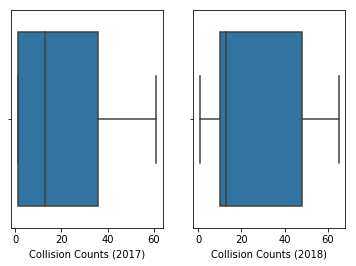

In [7]:
# get shape of two subsets
print("2017 subset shape:")
print(collisions_2017.shape)
print("2018 subset shape:")
print(collisions_2018.shape)

# group by streets
counts_2017 = collisions_2017.groupby(['street'], as_index = False).count()[0:9]
counts_2018 = collisions_2018.groupby(['street'], as_index = False).count()[0:9]

# Plot
fig, ax = plt.subplots(1,2)
sns.boxplot('Collision Counts (2017)', data = counts_2017, ax = ax[0])
sns.boxplot('Collision Counts (2018)', data = counts_2018, ax = ax[1])

The dataset sizes are roughly of the same order. As seen in the boxplots, the median collision frequency is 13.0, for both 2017 and 2018. No outliers are seen.

In [8]:
# Since no outliers, find mean
print('Per street collision mean (2017):')
print(counts_2017['Collision Counts (2017)'].mean());
print('Per street collision mean (2018):')
print(counts_2018['Collision Counts (2018)'].mean())

Per street collision mean (2017):
19.11111111111111
Per street collision mean (2018):
27.444444444444443


Number of collisions: mean > median, in both years. There is a significant difference, and it is safe to infer that the histograms would be considerably skewed to the right.

## Exploratory Analysis

Taking street dimensions into consideration came after analyzing street quality (OCI) first. No proper analysis could be made for the latter because of the restricted temporal applicability of OCI, prompting us to analyze something more objective and permanent such as street dimensions. We searched for correlation between street dimensions and collision frequency, covering all years in the collision dataset. The only analysis worth pursuing was correlation with street width. Length did not seem to matter (intuitively as well), and hence area did not give interesting results. To show correlation we create a scatter plot and draw a best-fit line to summarize the correlation.

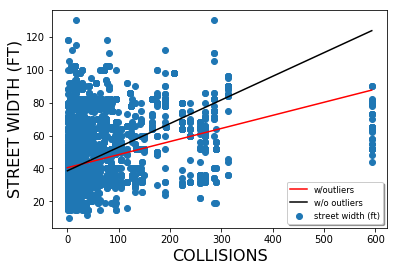

In [9]:
# best fit line over scatter plot
a, b = np.polyfit(df_index_collisions['collisions'], 
                  df_index_collisions['street width (ft)'], 1)
# start and end for line
in_oci = np.arange(0, max(df_index_collisions['collisions']) + 1)
# apply prediction formula for best fit
pred_oci = a * in_oci + b

# create scatter plot with x-axis as collisions over 3 years, 
# and y-axis as the road segment width

plt.scatter(df_index_collisions['collisions'], 
            df_index_collisions['street width (ft)'])
plt.xlabel('COLLISIONS', fontsize = 16)
plt.ylabel('STREET WIDTH (FT)', fontsize = 16)
plt.plot(in_oci, pred_oci, color = "red", label='w/outliers')

# copy of the dataframe from which we will remove outliers
df_index_collisions_no_outliers = df_index_collisions
# best fit line over scatter plot with outliers removed
df_index_collisions_no_outliers = (
    df_index_collisions_no_outliers[(np.abs(stats.zscore(
        df_index_collisions_no_outliers['collisions'])) < 3)])

df_index_collisions_no_outliers = (
    df_index_collisions_no_outliers[(np.abs(stats.zscore(
        df_index_collisions_no_outliers['street width (ft)'])) < 3)])

a, b = np.polyfit(df_index_collisions_no_outliers['collisions'], 
                  df_index_collisions_no_outliers['street width (ft)'], 1)
# start and end for line
in_oci = np.arange(0, max(df_index_collisions['collisions']) + 1)
# apply prediction formula for best fit
pred_oci = a * in_oci + b
plt.plot(in_oci, pred_oci, color = "black", label='w/o outliers')

fontP = FontProperties()
fontP.set_size('small')
# legend for plot
plt.legend(loc='lower right',shadow=True, prop=fontP)

As seen above there is a positive correlation. Note that the data spans from January 2017 to May 2019, and the collisions frequencies are mostly in hundreds because they are summations of instances, instead of single occurrences (we can use summation since street width remains relatively the same).

Immediately, the outliers over the 600 frequency mark raise a question as to why they are so far apart from the rest of the data. We came up with the explanation to this by looking which street this related to, and we found it to be University Avenue, which is very long, consists of several segments, and starts less than a mile from San Diego State University. This provides a logical explanation to the abnormally high frequency, possibly due to reckless driving by students. That being said, because of the high number of datapoints, another visualization will be necessary, in which log of collisions will be used to negate the effect of spread of data in the above visualization. 

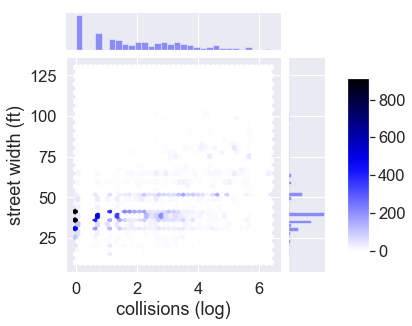


LOG COLLISION DATA

Pearson correlation coefficient r, p-value:
(0.4839159802555559, 0.0)

~Outliers Exluded~ Pearson correlation coefficient r, p-value:
(0.4407386112651605, 0.0)

ORIGINAL (W/O LOG) COLLISION DATA

Pearson correlation coefficient r, p-value:
(0.40231195103438105, 0.0)

~Outliers Exluded~ Pearson correlation coefficient r, p-value:
(0.4408528486729633, 0.0)


In [10]:
df_index_collisions_copy = df_index_collisions.copy()
df_index_collisions_no_outliers_copy = df_index_collisions_no_outliers.copy()

# take log of collisions column
df_index_collisions_copy['collisions (log)'] = (np.log
    (df_index_collisions_copy['collisions']))
    
df_index_collisions_no_outliers_copy['collisions (log)'] = (np.log
    (df_index_collisions_no_outliers_copy['collisions']))

# create hex plot for log data
sns.set(font_scale=1.5)
sns.set_style("darkgrid")
hexplot = sns.jointplot(x="collisions (log)", y="street width (ft)", 
                        data=df_index_collisions_copy, kind="hex",
                        color = "blue")

plt.subplots_adjust(left=0.2, right=0.8, top=0.8, bottom=0.2)
cbar_ax = hexplot.fig.add_axes([.85, .25, .05, .4])
plt.colorbar(cax=cbar_ax)
plt.show()

# Find correlation coefficient and significance for both log and original data
print('\n'+ 'LOG COLLISION DATA' + '\n')
print("Pearson correlation coefficient r, p-value:")
print(pearsonr(list(df_index_collisions_copy['collisions (log)']), 
               list(df_index_collisions_copy['street width (ft)'])))
print('\n'+ "~Outliers Exluded~ Pearson correlation coefficient r, p-value:")
print(pearsonr(list(df_index_collisions_no_outliers_copy['collisions (log)']), 
               list(df_index_collisions_no_outliers_copy['street width (ft)'])))

print('\n'+ 'ORIGINAL (W/O LOG) COLLISION DATA' + '\n')
print("Pearson correlation coefficient r, p-value:")
print(pearsonr(list(df_index_collisions['collisions']),
               list(df_index_collisions['street width (ft)'])))
print('\n'+ "~Outliers Exluded~ Pearson correlation coefficient r, p-value:")
print(pearsonr(list(df_index_collisions_no_outliers['collisions']),
               list(df_index_collisions_no_outliers['street width (ft)'])))

Clearly, a positive correlation between street width and number of collisions (log) is seen in the hex plot. The correlation coefficient suggest moderately strong positive correlation between the two, and the p-value suggests that it is highly significant and not due to chance (for both outliers included and excluded). The difference between log data and original (without log) data is pronounced in our outlier-inclusive data, though the difference is only in the order of second decimal place, and the correlation remains significant.

# Parking Meters vs Collisions

Now we will look for a potential relationship between number of parking meters and number of collisions on a street. Before conducting analysis, our hypothesis was that the more the number of parking meters on the street, the less street width available for moving cars, and hence the street might have higher collision frequency. Note: Descriptives for parking meters not available since the data are geographical and selective.

In [11]:
# map streets to number of parking meters
num_meters = {}

# loop through each parking meter entry and add up based on street
for index, row in df_meters.iterrows():
    # remove the street #
    street_name = " ".join(str(row["area"]).split(" ")[1:])
    
    # add to dictionary
    if num_meters.get(street_name) == None:
        num_meters[street_name] = 0
    num_meters[street_name]+=1

In [12]:
# new datafram with collisions and parking meters for streets that have at least 1 collision
df_pmcollisions = pd.DataFrame()
df_pmcollisions["street_name"] = num_collisions.keys()
df_pmcollisions["collisions"] = num_collisions.values()
df_pmcollisions["parking_meters"] = 0

# loop through and add # of parking meters based on our dictionary
for index, rows in df_pmcollisions.iterrows():
    street_name = rows["street_name"]
    
    if num_meters.get(street_name) != None:
        df_pmcollisions.loc[index, "parking_meters"] = num_meters[street_name]

    # drop rows for which no parking meter information is available
    if df_pmcollisions['parking_meters'][index] == 0:
        df_pmcollisions.drop(index, inplace=True)
        
df_pmcollisions = df_pmcollisions.reset_index()
df_pmcollisions.drop('index', inplace=True, axis=1)
df_pmcollisions.tail()

,street_name,collisions,parking_meters
48,UPAS ST,18,21
49,LINDO PASEO,3,5
50,OLIVE ST,3,8
51,ELM ST,11,20
52,QUINCE ST,1,11


We now have 53 streets worth of data for both parking meters and collisions.

Text(0.5, 0, 'Number of Parking Meters')

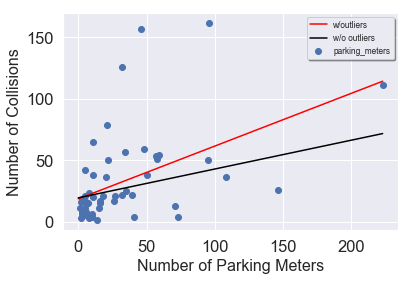

In [13]:
# plot scatter lot between collisions and 
# number of parking meters on that street

plt.scatter(df_pmcollisions['collisions'], df_pmcollisions['parking_meters'])

# best fit line over scatter plot including outliers
a, b = np.polyfit(df_pmcollisions['collisions'], 
                  df_pmcollisions['parking_meters'], 1)
# start and end for line
in_oci = np.arange(0, max(df_pmcollisions['collisions']) + 1)
# apply prediction formula for best fit
pred_oci = a * in_oci + b
plt.plot(in_oci, pred_oci, color = "red", label='w/outliers')

# copy of the dataframe from which we will remove outliers
df_pmcollisions_no_outliers = df_pmcollisions
# best fit line over scatter plot with outliers removed
df_pmcollisions_no_outliers = (
    df_pmcollisions_no_outliers[(np.abs(
        stats.zscore(df_pmcollisions_no_outliers['collisions'])) < 3)])

df_pmcollisions_no_outliers = (
    df_pmcollisions_no_outliers[(np.abs(
        stats.zscore(df_pmcollisions_no_outliers['parking_meters'])) < 3)])

a, b = np.polyfit(df_pmcollisions_no_outliers['collisions'], 
                  df_pmcollisions_no_outliers['parking_meters'], 1)

# start and end for line
in_oci = np.arange(0, max(df_pmcollisions['collisions']) + 1)
# apply prediction formula for best fit
pred_oci = a * in_oci + b
plt.plot(in_oci, pred_oci, color = "black", label='w/o outliers')

# create legend for plot
plt.legend(loc='upper right', prop=fontP, shadow=True)

plt.ylabel("Number of Collisions", fontsize = 16)
plt.xlabel("Number of Parking Meters", fontsize = 16)

In [14]:
print("Pearson correlation coefficient r, p-value:")
print(pearsonr(list(df_pmcollisions['collisions']),
               list(df_pmcollisions['parking_meters'])))
print('\n'+ "~Outliers Exluded~ Pearson correlation coefficient r, p-value:")
print(pearsonr(list(df_pmcollisions_no_outliers['collisions']),
               list(df_pmcollisions_no_outliers['parking_meters'])))

Pearson correlation coefficient r, p-value:
(0.4820041539545567, 0.0002576800522596902)

~Outliers Exluded~ Pearson correlation coefficient r, p-value:
(0.29498370597530926, 0.03756068135329193)


Verfying the result seen in the scatter plot, the correlation coefficient shows moderate and significant positive correlation between number of parking meters on a street and number of collisions on the street. When outliers are excluded, weak positive correlation is seen, though it is still significant with p-value < (α = 0.05).

It is important to note that this correlation may be pointing to a third variable, such as average traffic on the street, as streets with more number of parking meters are often the ones with higher daily traffic. Since this analysis cannot point to causality, we cannot rule out the third variable problem.

# Geographical Heatmap Analysis

Obtaining latitude and longitude coordinates from street names: We converted geocodes in a separate file to prevent from overcalling the openmapquest API. This also helps keep the API key private, which can be important for public files. Geo-coding used follows:

First we create new dataframes holding collision data from 2017 till date, and obtain latitudes and longitudes of the streets on which the collisions occured.


```
    #get_geocode is a function that calls the openmapquest api for coordinates
    #If the request fails, None will be returned
        def get_geocode( address ):
            
            #format the api key and address into the url
            to_request = url.format( api_key, address )
            
            #request the geocode, converting what is returned to text
            ret_json = requests.get( to_request ).text
            
            #replace all instance of \\ with raw values for \\
            #because python automatically discards \\
            ret_json = ret_json.replace( '\\' , r'\\')
            
            #if the get statement was good, load the json
            if ret_json != 0:
                data = json.loads( ret_json )
                
                #if the json found a location for an address
                #return lat and long coordinates
                if data[ 'results' ] != None:
                    return data['results'][0]['locations'][0]['latLng']
                    
            #otherwise return none
            return None

    #loads the dataframe from the main program and updates the dataframe with
    #latitude and longitude coordinates

        df_tc = pd.read_csv( 'df_traffic_collisions.csv', index_col=0)
        df_tc['lat'] = ''
        df_tc['lng'] = ''

        for index, row in df_tc.iterrows():
            latLng = get_geocode(row['street_name'] + str( ', San Diego, CA' ))    
            if latLng != None:
                df_tc[ 'lat' ][index] = latLng['lat']
                df_tc[ 'lng' ][index] = latLng['lng']

    #save the updated dataframe for use in the main program
        df_tc.to_csv( 'df_geo.csv' )
```

Separating the updated list of street names based on the year the data was collected:

In [15]:
#read data file and drop index column
df_geo = pd.read_csv( 'df_geo_data.csv' )
df_geo.drop( columns = 'Unnamed: 0', inplace = True )

#sort the data based on the date
df_geo.sort_values( 'date_time', inplace = True )

#based on a substring of the date_time column create a 
#boolean series that compares the last two digits of the year
mask_17 = df_geo.date_time.str[ 2:4 ] == '17' 
mask_18 = df_geo.date_time.str[ 2:4 ] == '18'
mask_19 = df_geo.date_time.str[ 2:4 ] == '19' 

#placing the boolean series back into the dataframe
#creates split dataframes based on the series
geo_17 = df_geo[ mask_17 ]
geo_18 = df_geo [ mask_18 ]
geo_19 = df_geo[ mask_19 ]

#print all dataframes
print( "Data for 2017, 2018, 2019 as 3 separate dataframes:" + '\n' )
multiple_df_display( geo_17[0:4], geo_18[0:4], geo_19[0:4] )

Data for 2017, 2018, 2019 as 3 separate dataframes:



,date_time,street_name,lat,lng
0,2017-01-01 00:01:00,8300 CAM DEL ORO,39.783730,-100.445882
1,2017-01-01 00:01:00,6400 CRAWFORD STREET,32.789800,-117.093874
2,2017-01-01 00:01:00,8100 ROYAL GORGE DRIVE,32.815968,-117.052010
3,2017-01-01 00:01:00,5500 VALERIO TRAIL,32.962291,-117.202294
,date_time,street_name,lat,lng
10238,2018-01-01 00:30:00,6500 EL CAMINO DE TEATRO,39.783730,-100.445882
10239,2018-01-01 01:00:00,500 ROSECRANS STREET,32.743800,-117.213018
10240,2018-01-01 01:26:00,0 PALM AVENUE,32.683661,-117.091815
10241,2018-01-01 02:05:00,3100 LOGAN AVENUE,32.696842,-117.099701
,date_time,street_name,lat,lng


Compare geographical heatmaps of the past 3 years' collision data

```

# Creating a central location we would like to initialize the focus on. 
# Parameters: Lattitude, Longitude, Zoom
gmap_17 = folium.Map([32.875, -117.162498], zoom_start = 10)
gmap_18 = folium.Map([32.875, -117.162498], zoom_start = 10)
gmap_19 = folium.Map([32.875, -117.162498], zoom_start = 10)
    
# convert to (n, 2) nd-array format for heatmap
heatmap_arr_17 = geo_17[['lat', 'lng']].as_matrix()
heatmap_arr_18 = geo_18[['lat', 'lng']].as_matrix()
heatmap_arr_19 = geo_19[['lat', 'lng']].as_matrix()

# plot heatmap
gmap_17.add_child(plugins.HeatMap(heatmap_arr_17, radius=14))
gmap_18.add_child(plugins.HeatMap(heatmap_arr_18, radius=14))
gmap_19.add_child(plugins.HeatMap(heatmap_arr_19, radius=14))

```

We now plot the collision data onto the San Diego map.

Upper-Left: 2017

Upper-Right: 2018

Bottom: 2019; note: this year's data not complete

<img src="geo_heatmap.png">


LOW COLLISION FREQUENCY - - - - - - - - - - -  HIGH COLLISION FREQUENCY
<img src="folium_colormap.png" align="left" style="width: 500px;"/>

Looking at the two heatmaps with complete data available (2018 & 2019), a geographical pattern of collisions is seen. Streets around Downtown San Diego, the airport area, San Diego State University, and areas around UCSD are identified with higher number of collisions.

# Privacy and Ethics Consideration

Data privacy and ethical usage of data have become increasingly important in tech as data becomes more readily available and easier to extract. Therefore, we want to ensure that we responsibly collected and analyzed the data for this proposed project. The data we collected can be found on the official City of San Diego website, meaning that it is publicly available, license free and non-proprietary. According to the Open Government Data law (OGD), government data is made public in order to promote transparency and accountability of public institutions. Therefore, using this public data for the intended analysis does not pose any breach of data privacy or ethical concerns. Also, no names or personal information has been used in the datasets to protect the privacy of citizens. In addition, all data published publicly on government websites are required to satisfy a set of guidelines. These data sets are also used to help decide public laws and policies and therefore, are required to be of utmost granularity, meaning the datasets are highly detail oriented. Therefore, we can conclude that the data we are working with is unbiased and accurate. However, we cannot rule out the possibility of our analysis having potential confirmation bias or presence of third variables in correlations. Other important variables such as instantaneous traffic could act as third variables in the correlations we saw.

# Discussion

Through the analysis carried out, we identified the effects of variables noted as possible contributing factors to collision frequency in our hypothesis. We also identified clear geographical patterns that maintained temporal validity - another important sub-part of our question and hypothesis. We propose keeping these findings in consideration to reduce traffic collisions in San Diego, though this can mostly be done through government efforts, as the factors analyzed are not in the control of the public.

In summary, the relationship between street width and number of collisions showed a moderate positive correlation between the two. The comparison between the number of parking meters and number of collisions showed moderate positive correlation as well, with weak but still significant correlation when outliers were removed from the dataset. Geographical mapping of collision data on heat maps (2017 to date) showed higher collision numbers in areas near UCSD, SDSU, and the international airport, primarily. The observed patterns were temporally similar.

# Limitations

Certain limitations we encountered while analyzing our data must be noted for interpretation purposes. When we conducted our analysis on parking meter data, we found out that this dataset only contained information for 53 unique streets. This limited our analysis as there were many more streets recorded in the collisions dataset. Smaller sample sizes can cause results to have a higher possibility of effect overestimation. Although we were able to find a positive correlation between the number of parking meters and the number of collisions on a street, the reduced sample size lowers the external validity of our results. 

We also wanted to make an analysis between the number of traffic collisions and the volume of traffic on a certain street (as traffic and collisions often go hand in hand). However, during our analysis we realized that the latter dataset recorded traffic volume at a standard time (mostly 00:00:00 on each date). In contrast, in the Traffic Collisions dataset, collisions were recorded at different times (when they actually occurred). If we had known the traffic volume around the time of the traffic collision on a specific street, a more accurate analysis could have been derived. As a result, we decided not to include the traffic volume dataset in our analysis, to avoid inaccurate misrepresentation of data.

# Continuation of Analysis & Ideas for Future Research

A possible misinterpretation concerning our results could occur if people started taking different streets or routes because of our analysis. Areas that haven’t been as affected by collisions as of date might end up with higher traffic volume, which might lead to an increase in traffic collisions in newer areas.

To solve this, one solution could be to have continued analysis of new data collected. If necessary, further research can be done to inform the public of the up-to-date corrections in order to prevent harm. Further research could also improve any shortcomings in our analysis by looking through other variables that could affect collision data significantly, and offer concrete suggestions for avoiding collisions.